# San Francisco Rental Prices Dashboard
In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [53]:
# imports
import panel as pn
import plotly.express as px
pn.extension('plotly')
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [54]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

# Import Data

In [55]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)

# Panel Visualizations
In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard.

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any .show() lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [56]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    
    # YOUR CODE HERE!
    
    df_housing_units = sfo_data["housing_units"].groupby(sfo_data.index).mean()
    
    fig_housing_units = plt.figure()
    plot_housing_units = df_housing_units.plot.bar()
    plot_housing_units.set_xlabel("Year", fontsize=12)
    plot_housing_units.set_ylabel("Housing Units", fontsize=12)
    plot_housing_units.set_title("Housing Units in SF from 2010 to 2016", fontsize=14, fontweight="bold")
    
    # use min, max, and std to scale the ylimits of the chart
    housing_units_std = df_housing_units.std()
    housing_units_min = min(df_housing_units)
    housing_units_max = max(df_housing_units)
    
    plot_housing_units.set_ylim(housing_units_min - housing_units_std, housing_units_max + housing_units_std)
    
#    plt.close(fig_housing_units)
#    return pn.pane.Matplotlib(fig_housing_units, tight=True)

    plt.show()
    plt.close(fig_housing_units)
    
def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    # YOUR CODE HERE!
    df_avg_costs = (sfo_data[["sale_price_sqr_foot", "gross_rent"]]
        .groupby(sfo_data.index).mean())
    
    fig_avg_gross_rent = plt.figure()
    plot_avg_gross_rent = df_avg_costs["gross_rent"].plot()
    plot_avg_gross_rent.set_xlabel("Year", fontsize=12)
    plot_avg_gross_rent.set_title("Average Gross Rent in SFO", fontsize=14, fontweight="bold")
    plt.close(fig_avg_gross_rent)
    return pn.pane.Matplotlib(fig_avg_gross_rent, tight=True)


def average_sales_price():
    """Average Sales Price Per Year."""
    
    # YOUR CODE HERE!
    df_avg_costs = (sfo_data[["sale_price_sqr_foot", "gross_rent"]]
        .groupby(sfo_data.index).mean())
                              
    fig_avg_sale_price = plt.figure()
    plot_avg_sale_price = df_avg_costs["sale_price_sqr_foot"].plot()
    plot_avg_sale_price.set_xlabel("Year, fontsize=12")
    plot_avg_sale_price.set_ylabel("Average Sale Price", fontsize=12)
    plot_avg_sale_price.set_title("Average Sale Price per Square Foot", fontsize=14, fontweight="bold")
    
    plt.close(fig_avg_sale_price)
    return pn.pane.Matplotlib(fig_avg_sale_price, tight=True)

def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    # YOUR CODE HERE!
    df_costs = sfo_data.groupby([sfo_data.index, "neighborhood"]).mean()
    df_costs.reset_index(inplace=True)
    df_costs.rename(columns={"level_0": "year"}, inplace=True)
    
    sale_price_curve = df_costs.hvplot.line(
        "year",
        "sale_price_sqr_foot",
    xlabel="Year",
    ylabel="Average Sale Price per Square Foot",
    groupby="neighborhood"
    )
    
    return sale_price_curve

def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    
    df_expensive_neighborhoods = sfo_data.groupby(by="neighborhood").mean()
    df_expensive_neighborhoods = df_expensive_neighborhoods.sort_values(
        by="sale_price_sqr_foot", ascending=False
    ).head(10)
    df_expensive_neighborhoods = df_expensive_neighborhoods.reset_index()
    
    expensive_neighborhoods = df_expensive_neighborhoods.hvplot.bar(
        "neighborhood",
        "sale_per_sqr_foot",
        title="Top 10 Expensive Neighborhoods in SFO",
        ylabel="Neighborhood",
        height=400,
        rot=90,
    )
    
    return expensive_neighborhoods

def parallel_coordinates():

    """Parallel Coordinates Plot."""
    
    # YOUR CODE HERE!
    df_expensive_neighborhoods = sfo_data.groupby(by="neighborhood").mean()
    df_expensive_neighborhoods = df_expensive_neighborhoods.sort_values(
        by="sale_price_sqr_foot", ascending=False).head(10)
    df_expensive_neighborhoods = df_expensive_neighborhoods.reset_index()
    
    expensive_coordinates_plot = px.parallel_coordinates(
        df_expensive_neighborhoods,
        color="sale_price_sqr_foot",
        color_continuous_scale=px.colors.sequential.Inferno,
    )
    return expensive_coordinates_plot

def parallel_categories():
    """Parallel Categories Plot."""
    
    # YOUR CODE HERE!
    df_expensive_neighborhoods = sfo_data.groupby(by="neighborhood").mean()
    df_expensive_neighborhoods = df_expensive_neighborhoods.sort_values(
        by="sale_price_sqr_foot", ascending=False).head(10)
    df_expensive_neighborhoods = df_expensive_neighborhoods.reset_index()
    
    expensive_categories_plot = px.parallel_categories(
        df_expensive_neighborhoods,
        color="sale_price_sqr_foot",
        color_continuous_scale=px.colors.sequential.Inferno,
    )
    return expensive_categories_plot

def neighborhood_map():
    
    
    """Neighborhood Map"""
    
# YOUR CODE HERE!
    df_neighborhood_locations = pd.read_csv(file_path)
    all_neighborhoods = df_neighborhood_locations.groupby(by="neighborhood").mean()
    all_neighborhoods.reset_index(inplace=True)
    all_neighborhoods.rename(columns={'neighborhood': 'Neighborhood'}, inplace=True)
    all_neighborhoods.pd.merge(df_neighborhood_locations, all_neighborhoods, on='Neighborhood')
    
    px.set_mapbox_access_token(mapbox_token)
    map_scatter = px.scatter_mapbox(
        all_neighborhoods,
        lat='Lat',
        lon='Lon',
        size='sale_price_sqr_foot',
        color='gross_rent',
        color_continuous_scale=px.colors.cyclical.IceFire,
        size_max=15,
        zoom=11,
        hover_name='neighborhood',
        title='Average Sale Price per Square Foot and Gross Rent in SFO')
    
    return neighborhood_map

# Panel Dashboard
In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

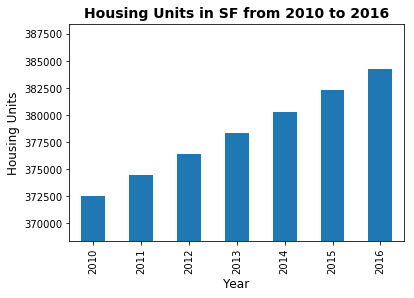

DataError: Supplied data does not contain specified dimensions, the following dimensions were not found: ['sale_per_sqr_foot']

PandasInterface expects tabular data, for more information on supported datatypes see http://holoviews.org/user_guide/Tabular_Datasets.html

In [57]:
housing_unit = pn.Column("## SF Housing Unit", housing_units_per_year())

housing_avg = pn.Column(
    "## SF Average Value",
    average_gross_rent(),
    average_sales_price(),
    average_price_by_neighborhood())

expensive_neighborhood = pn.Column(
    "## Top 10 Most Expensive Neighborhoods",
    top_most_expensive_neighborhoods()
)

parellel_plot = pn.Column(
    "## Parallel plot",
    parallel_coordinates(),
    parallel_categories())

map_plot = pn.Column(
    "## San Fran Map",
    neighborhood_map())

panel = pn.Tabs(("Housing Units", housing_unit),
               ("Housing Average", housing_avg),
               ("10 Exp Neighborhood", expensive_neighborhood),
               ("Parellel Plot", parallel_plot),
               ("SF MAP", map_plot))

# Serve the Panel Dashboard

In [58]:
panel.servable()

NameError: name 'panel' is not defined